In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import tensorflow as tf
import common_functions as cf

# Load data

In [2]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path = "../Data/Augmented/", batch_size=12)


Found 24958 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.


## Create ensemble of CNNs

Create ensemble model

In [3]:
#Initialize keras session
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
#ANN
ann = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(480, 640, 3)),
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dense(
                  units = 13,
                activation = "softmax"
          )])
ann.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

ann.fit(
train_ds,
validation_data=validation_ds,
epochs=5)
  
#Model 2 = Custom CNN
cnn = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(len(class_names))])
cnn.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

cnn.fit(
train_ds,
validation_data=validation_ds,
epochs=5)
'''
#Model 3 = CNN-LTSM
cnn_ltsm = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.ConvLSTM2D(16, 3, kernel_regularizer='l2', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(len(class_names)) 
])

cnn_ltsm.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

cnn_ltsm.fit(
train_ds,
validation_data=validation_ds,
epochs=5)

'''

Epoch 1/5
2080/2080 [==============================] - 99s 46ms/step - loss: 60.8176 - accuracy: 0.3710 - val_loss: 40.8179 - val_accuracy: 0.3175
Epoch 2/5
2080/2080 [==============================] - 95s 46ms/step - loss: 19.7235 - accuracy: 0.4894 - val_loss: 11.9255 - val_accuracy: 0.4516
Epoch 3/5
2080/2080 [==============================] - 95s 46ms/step - loss: 11.6091 - accuracy: 0.5256 - val_loss: 14.8709 - val_accuracy: 0.4508
Epoch 4/5
2080/2080 [==============================] - 95s 46ms/step - loss: 16.5715 - accuracy: 0.6271 - val_loss: 2.1669 - val_accuracy: 0.6849
Epoch 5/5
2080/2080 [==============================] - 96s 46ms/step - loss: 1.2973 - accuracy: 0.7411 - val_loss: 4.2682 - val_accuracy: 0.5844
Epoch 1/5
2080/2080 [==============================] - 90s 42ms/step - loss: 2.6801 - accuracy: 0.0769 - val_loss: 2.5649 - val_accuracy: 0.0769
Epoch 2/5
2080/2080 [==============================] - 86s 41ms/step - loss: 2.5650 - accuracy: 0.0769 - val_loss: 2.5649 -

"\n#Model 3 = CNN-LTSM\ncnn_ltsm = tf.keras.Sequential([\n    tf.keras.layers.Rescaling(1./255),\n    tf.keras.layers.ConvLSTM2D(16, 3, kernel_regularizer='l2', activation='relu'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(rate=0.4),\n    tf.keras.layers.Dense(len(class_names)) \n])\n\ncnn_ltsm.compile(\noptimizer='adam',\nloss='sparse_categorical_crossentropy',\nmetrics=['accuracy'])\n\ncnn_ltsm.fit(\ntrain_ds,\nvalidation_data=validation_ds,\nepochs=5)\n\n"

Create ensemble model

In [4]:
models = [ann, cnn]
input_layer = tf.keras.layers.Input(shape=(480, 640, 3))  
outputs = []
for i,model in enumerate(models):
    model._name = str(i)
    output = model(input_layer)
    outputs.append(output)
averaged_outputs = tf.reduce_mean(outputs, axis = 0)
output_layer = tf.keras.layers.Dense(13, activation='softmax')(averaged_outputs)  
ensemble_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

Fit ensemble model



In [5]:
ensemble_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = ensemble_model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=5)

Epoch 1/5


ResourceExhaustedError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1054, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer.py", line 543, in minimize
        self.apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer.py", line 1174, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer.py", line 637, in apply_gradients
        self.build(trainable_variables)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/adam.py", line 144, in build
        self.add_variable_from_reference(
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer.py", line 1106, in add_variable_from_reference
        return super().add_variable_from_reference(
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer.py", line 507, in add_variable_from_reference
        initial_value = tf.zeros(

    ResourceExhaustedError: {{function_node __wrapped__Fill_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[921600,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]


## Inspect model performance

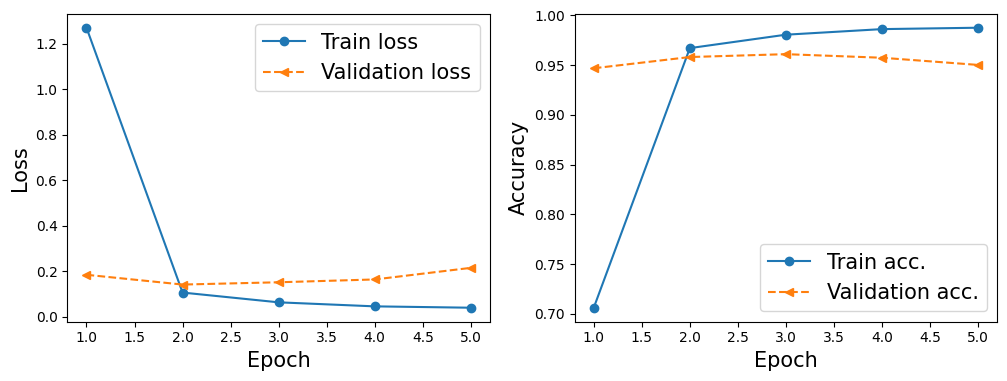

520/520 - 11s - loss: 0.2347 - accuracy: 0.9494 - 11s/epoch - 21ms/step
Test loss: 0.23465576767921448 | Test accuracy: 0.9493990540504456


(0.9876592755317688, 0.9502403736114502, 0.9493990540504456)

In [ ]:
cf.EvaluateModel(ensemble_model, test_ds, history)
